In [1]:
import squidpy as sq
import scanpy as sc
import numpy as np
import os
from sklearn.metrics import *
import scanpy.external as sce
import anndata as ad
import time
import STAGATE_pyG as STAGATE

/home/yzy/anaconda3/envs/stagate/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read_h5ad('spaceflow_dump/all.h5ad')

In [3]:
nslice_list = np.arange(2,32)

In [4]:
slice_list = adata.obs['slice_id'].cat.categories

In [5]:
pd_dict = {
    'nslice':[],
    'time_spaceflow':[],
    'time_harmony':[],

    'time_leiden':[],
    'time_louvain':[],
    'time_mclust':[]
}

In [6]:

for nslice in nslice_list:
    adata_use = adata[adata.obs['slice_id'].isin(slice_list[:nslice])]
    
    time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
    
    n_cls = np.unique(adata_use.obs['gt']).shape[0]
    time_st = time.time()
    sc.pp.pca(adata_use,n_comps=30)
    sce.pp.harmony_integrate(adata_use, 'slice_id')    
    time_ed = time.time()
    time_harmony = time_ed-time_st
    
    time_st = time.time()
    sc.pp.neighbors(adata_use,use_rep='X_pca_harmony')
    sc.tl.louvain(adata_use,resolution=0.5)
    time_ed = time.time()
    time_louvain = time_ed-time_st
    
    time_st = time.time()
    sc.pp.neighbors(adata_use,use_rep='X_pca_harmony')
    sc.tl.leiden(adata_use,resolution=0.5)
    time_ed = time.time()
    time_leiden = time_ed-time_st
    
    time_st = time.time()
    os.environ['R_HOME'] = '/home/yzy/anaconda3/envs/stagate/lib/R'
    adata_use = STAGATE.mclust_R(adata_use, used_obsm='X_pca_harmony', num_cluster=n_cls)
    time_ed = time.time()
    time_mclust = time_ed-time_st
    
    adata_use.uns['time_spaceflow'] = time_spaceflow
    adata_use.uns['time_harmony'] = time_harmony
    adata_use.uns['time_louvain'] = time_louvain
    adata_use.uns['time_leiden'] = time_leiden
    adata_use.uns['time_mclust'] = time_mclust
    
    pd_dict['nslice'].append(nslice)
    pd_dict['time_spaceflow'].append(time_spaceflow)
    pd_dict['time_harmony'].append(time_harmony)
    pd_dict['time_leiden'].append(time_leiden)
    pd_dict['time_louvain'].append(time_louvain)
    pd_dict['time_mclust'].append(time_mclust)
    
    adata_use.write_h5ad(f'spaceflow_multi_dump/{nslice}.h5ad')
    
    
    
    

    

/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 07:01:23,903 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 07:02:02,370 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 07:02:02,516 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 07:02:18,596 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 07:02:34,504 - harmonypy - INFO - Converged after 2 iterations
R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R 

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 07:03:35,933 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 07:04:18,828 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 07:04:19,202 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 07:04:47,612 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 07:05:13,514 - harmonypy - INFO - Converged after 2 iterations


fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 07:06:44,763 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 07:07:30,448 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 07:07:30,891 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 07:08:15,175 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 07:09:00,590 - harmonypy - INFO - Converged after 2 iterations


fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 07:10:31,140 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 07:11:19,162 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 07:11:19,700 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 07:12:20,321 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 07:13:14,582 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 07:14:08,016 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 07:15:02,356 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 07:15:57,397 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 07:16:52,626 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 07:17:4

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 07:19:50,641 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 07:20:40,199 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 07:20:40,840 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 07:21:46,472 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 07:22:46,377 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 07:23:44,415 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 07:24:42,730 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 07:25:35,024 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 07:26:30,767 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 07:27:2

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 07:31:59,341 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 07:32:50,262 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 07:32:50,928 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 07:34:00,044 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 07:35:08,902 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 07:36:18,602 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 07:37:27,344 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 07:38:34,302 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 07:39:42,373 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 07:40:4

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 07:43:08,319 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 07:44:01,564 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 07:44:02,281 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 07:45:27,047 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 07:46:53,328 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 07:48:23,462 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 07:49:50,036 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 07:51:15,588 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 07:52:43,180 - harmonypy - INFO - Converged after 6 iterations


fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 07:56:31,414 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 07:57:26,023 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 07:57:26,772 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 07:58:58,515 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 08:00:30,201 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 08:02:01,226 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 08:03:30,814 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 08:04:57,802 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 08:06:13,967 - harmonypy - INFO - Converged after 6 iterations


fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 08:09:08,226 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 08:10:04,033 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 08:10:05,071 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 08:11:52,700 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 08:13:33,521 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 08:15:14,973 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 08:16:56,225 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 08:18:36,188 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 08:20:13,670 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 08:21:1

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 08:24:39,777 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 08:25:37,443 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 08:25:38,702 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 08:27:43,015 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 08:29:48,335 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 08:31:55,855 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 08:34:00,150 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 08:36:08,983 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 08:37:38,479 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 08:38:5

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 08:47:34,606 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 08:48:32,977 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 08:48:34,180 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 08:50:45,369 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 08:52:59,096 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 08:55:14,691 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 08:57:30,299 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 08:59:44,387 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 09:01:55,568 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 09:03:5

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 09:10:35,228 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 09:11:35,402 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 09:11:36,754 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 09:13:57,220 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 09:16:16,843 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 09:18:36,902 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 09:20:56,756 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 09:23:14,411 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 09:25:14,615 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 09:27:0

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 09:34:32,186 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 09:35:33,562 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 09:35:35,030 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 09:38:06,740 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 09:40:30,763 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 09:42:53,683 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 09:45:14,906 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 09:47:41,230 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 09:50:18,529 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 09:56:4

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 10:19:04,281 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 10:20:09,117 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 10:20:10,741 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 10:22:50,435 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 10:25:21,616 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 10:29:27,321 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 10:32:08,319 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 10:34:43,965 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 10:37:17,013 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 10:39:1

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 10:52:03,471 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 10:53:08,338 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 10:53:09,998 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 10:56:00,693 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 10:58:45,694 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 11:01:23,602 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 11:04:01,310 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 11:06:53,143 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 11:09:47,750 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 11:12:3

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 11:24:37,834 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 11:25:45,546 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 11:25:47,273 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 11:29:01,507 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 11:31:57,940 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 11:34:59,024 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 11:37:50,506 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 11:40:52,414 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 11:43:52,827 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 11:46:0

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 11:55:21,326 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 11:56:30,106 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 11:56:31,860 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 11:59:53,610 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 12:03:04,344 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 12:06:18,633 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 12:09:23,987 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 12:12:44,120 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 12:15:06,801 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 12:17:3

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 12:30:26,867 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 12:31:37,600 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 12:31:39,431 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 12:35:06,768 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 12:38:23,988 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 12:41:47,003 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 12:44:58,655 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 12:48:33,100 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 12:51:39,671 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 12:55:0

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 13:10:16,288 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 13:11:28,272 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 13:11:30,196 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 13:15:04,200 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 13:18:33,688 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 13:22:01,719 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 13:25:39,895 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 13:29:07,554 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 13:31:48,741 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 13:33:5

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 13:44:57,518 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 13:46:12,233 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 13:46:14,272 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 13:49:59,757 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 13:53:36,221 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 13:57:14,590 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 14:01:00,509 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 14:04:45,836 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 14:08:24,123 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 14:12:1

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 14:28:50,448 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 14:30:06,819 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 14:30:08,927 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 14:34:12,421 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 14:38:10,154 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 14:42:11,782 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 14:46:04,039 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 14:49:58,054 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 14:53:30,732 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 14:56:0

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 15:09:57,830 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 15:11:15,508 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 15:11:17,682 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 15:15:46,245 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 15:20:07,227 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 15:24:13,465 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 15:28:13,458 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 15:32:18,907 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 15:35:54,366 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 15:38:3

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 15:50:06,665 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 15:51:25,681 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 15:51:27,960 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 15:55:40,414 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 15:59:49,500 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 16:04:01,333 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 16:08:08,078 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 16:12:22,384 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 16:15:27,324 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 16:18:0

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 16:32:02,902 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 16:33:23,098 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 16:33:25,300 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 16:37:35,161 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 16:41:57,488 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 16:46:17,338 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 16:50:27,413 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 16:54:40,831 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 16:57:59,945 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 17:01:1

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 17:13:51,233 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 17:15:13,534 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 17:15:15,930 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 17:19:50,788 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 17:24:11,851 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 17:28:30,745 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 17:32:45,495 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 17:37:11,041 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 17:41:29,217 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 17:44:2

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 17:57:38,356 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 17:59:00,761 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 17:59:03,212 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 18:03:45,271 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 18:08:31,919 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 18:13:18,915 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 18:18:03,463 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 18:23:11,617 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 18:26:33,021 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 18:29:4

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 18:45:57,298 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 18:47:22,539 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 18:47:25,086 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 18:52:19,773 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 18:57:02,923 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 19:01:55,232 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 19:06:47,264 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 19:11:33,220 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 19:15:13,951 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 19:17:5

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 19:34:28,891 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 19:35:54,667 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 19:35:57,168 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 19:40:34,466 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 19:45:17,484 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 19:50:13,527 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 19:55:17,492 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 20:00:11,463 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 20:03:54,283 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 20:06:4

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 20:20:53,563 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 20:22:22,540 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 20:22:25,297 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 20:27:38,081 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 20:32:45,940 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 20:38:00,779 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 20:43:06,449 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 20:47:40,648 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 20:51:54,865 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 20:55:5

fitting ...
  |======================================================================| 100%


/tmp/ipykernel_57196/3440956574.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_spaceflow = np.sum(adata_use.obs.groupby('slice_id').agg('median')['time'])
2023-03-07 21:20:47,345 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-07 21:22:17,869 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-03-07 21:22:20,743 - harmonypy - INFO - Iteration 1 of 10
2023-03-07 21:27:27,916 - harmonypy - INFO - Iteration 2 of 10
2023-03-07 21:32:56,945 - harmonypy - INFO - Iteration 3 of 10
2023-03-07 21:38:17,950 - harmonypy - INFO - Iteration 4 of 10
2023-03-07 21:43:23,648 - harmonypy - INFO - Iteration 5 of 10
2023-03-07 21:48:38,012 - harmonypy - INFO - Iteration 6 of 10
2023-03-07 21:51:55,393 - harmonypy - INFO - Iteration 7 of 10
2023-03-07 21:55:0

fitting ...
  |======================================================================| 100%


In [7]:
import pandas as pd
pd_df = pd.DataFrame(pd_dict)
pd_df.to_feather('spaceflow_multi_dump/time_rst.feather')

In [8]:
pd_df

,nslice,time_spaceflow,time_harmony,time_leiden,time_louvain,time_mclust
0,2,202.770758,70.896714,8.498340,25.420644,27.031720
1,3,326.521289,97.927472,17.199412,16.812112,56.610374
2,4,454.521820,136.262146,20.124380,21.781688,47.995373
3,5,544.209268,437.335468,24.039849,22.205297,75.687387
4,6,633.968067,589.498726,62.982621,33.197937,42.802344
5,7,732.213060,570.305983,23.069376,28.291617,46.951420
6,8,815.000730,575.435371,58.454082,32.997629,135.891270
7,9,893.295690,583.243941,50.877418,36.449416,85.978628
8,10,989.048913,776.075187,64.408913,36.381121,54.434159
9,11,1061.816393,1041.184932,94.360377,41.690566,197.237329


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

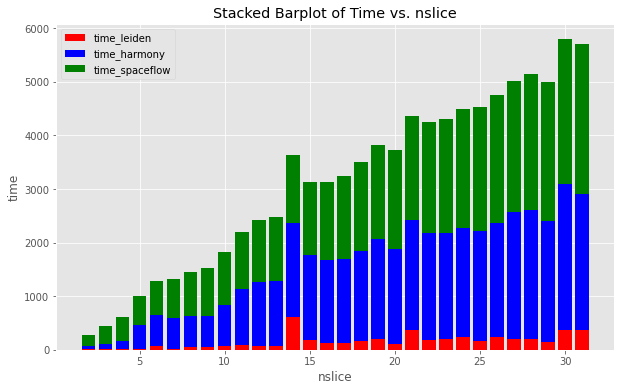

In [10]:
# 设置图形参数
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))

# 生成 stacked barplot
ax.bar(pd_df['nslice'], pd_df['time_leiden'], label='time_leiden', color='red', width=0.8)
ax.bar(pd_df['nslice'], pd_df['time_harmony'], label='time_harmony', color='blue', width=0.8, bottom=pd_df['time_leiden'])
ax.bar(pd_df['nslice'], pd_df['time_spaceflow'], label='time_spaceflow', color='green', width=0.8, bottom=pd_df['time_leiden']+pd_df['time_harmony'])

# 设置图形标签
ax.set_xlabel('nslice')
ax.set_ylabel('time')
ax.set_title('Stacked Barplot of Time vs. nslice')
ax.legend()

# 展示图形
plt.show()

In [13]:
pd_df

,nslice,time_spaceflow,time_harmony,time_leiden,time_louvain,time_mclust
0,2,202.770758,70.896714,8.498340,25.420644,27.031720
1,3,326.521289,97.927472,17.199412,16.812112,56.610374
2,4,454.521820,136.262146,20.124380,21.781688,47.995373
3,5,544.209268,437.335468,24.039849,22.205297,75.687387
4,6,633.968067,589.498726,62.982621,33.197937,42.802344
5,7,732.213060,570.305983,23.069376,28.291617,46.951420
6,8,815.000730,575.435371,58.454082,32.997629,135.891270
7,9,893.295690,583.243941,50.877418,36.449416,85.978628
8,10,989.048913,776.075187,64.408913,36.381121,54.434159
9,11,1061.816393,1041.184932,94.360377,41.690566,197.237329


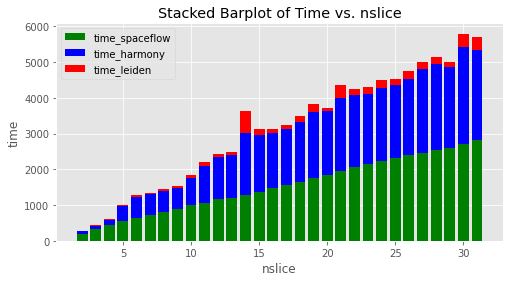

In [16]:
# 设置图形参数
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 4))

# 生成 stacked barplot，注意 bottom 参数的指定
ax.bar(pd_df['nslice'], pd_df['time_spaceflow'], label='time_spaceflow', color='green', width=0.8)
ax.bar(pd_df['nslice'], pd_df['time_harmony'], label='time_harmony', color='blue', width=0.8, bottom=pd_df['time_spaceflow'])
ax.bar(pd_df['nslice'], pd_df['time_leiden'], label='time_leiden', color='red', width=0.8, bottom=pd_df['time_spaceflow']+pd_df['time_harmony'])

# 设置图形标签
ax.set_xlabel('nslice')
ax.set_ylabel('time')
ax.set_title('Stacked Barplot of Time vs. nslice')
ax.legend()

# 展示图形
plt.show()







No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


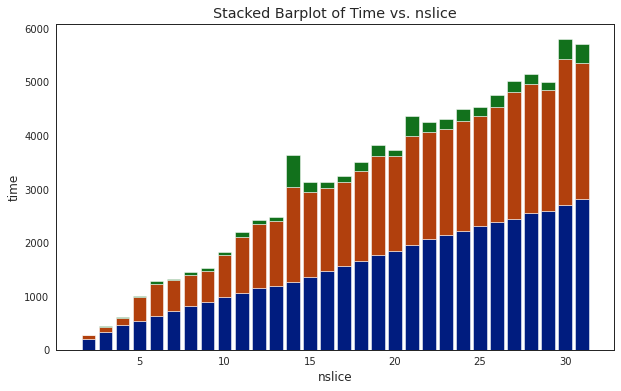

In [29]:
# 设置图形参数

# 设置图形参数
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10, 6))

# 设置颜色
palette = sns.color_palette('dark', n_colors=3)

# 生成 stacked barplot，注意 bottom 参数的指定
ax.bar(pd_df['nslice'], pd_df['time_spaceflow'], color=palette[0], width=0.8)
ax.bar(pd_df['nslice'], pd_df['time_harmony'], color=palette[1], width=0.8, bottom=pd_df['time_spaceflow'])
ax.bar(pd_df['nslice'], pd_df['time_leiden'], color=palette[2], width=0.8, bottom=pd_df['time_spaceflow']+pd_df['time_harmony'])

# 设置图形标签
ax.set_xlabel('nslice')
ax.set_ylabel('time')
ax.set_title('Stacked Barplot of Time vs. nslice')

# 隐藏图例
ax.legend().remove()

# 展示图形
# plt.show()
plt.savefig(f'figures/spaceflow/time_stacked_leiden.pdf',dpi=400,bbox_inches='tight',transparent=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


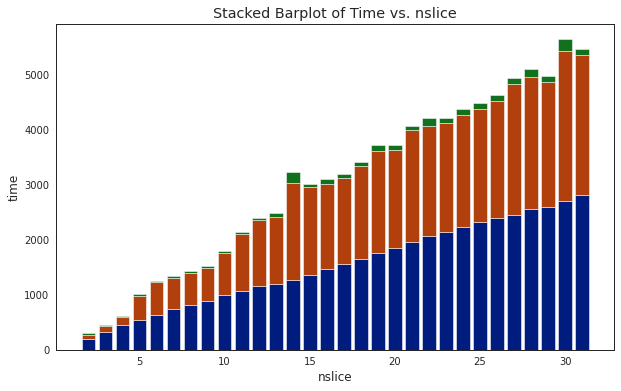

In [30]:
# 设置图形参数

# 设置图形参数
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10, 6))

# 设置颜色
palette = sns.color_palette('dark', n_colors=3)

# 生成 stacked barplot，注意 bottom 参数的指定
ax.bar(pd_df['nslice'], pd_df['time_spaceflow'], color=palette[0], width=0.8)
ax.bar(pd_df['nslice'], pd_df['time_harmony'], color=palette[1], width=0.8, bottom=pd_df['time_spaceflow'])
ax.bar(pd_df['nslice'], pd_df['time_louvain'], color=palette[2], width=0.8, bottom=pd_df['time_spaceflow']+pd_df['time_harmony'])

# 设置图形标签
ax.set_xlabel('nslice')
ax.set_ylabel('time')
ax.set_title('Stacked Barplot of Time vs. nslice')

# 隐藏图例
ax.legend().remove()

# 展示图形
# plt.show()
plt.savefig(f'figures/spaceflow/time_stacked_louvain.pdf',dpi=400,bbox_inches='tight',transparent=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


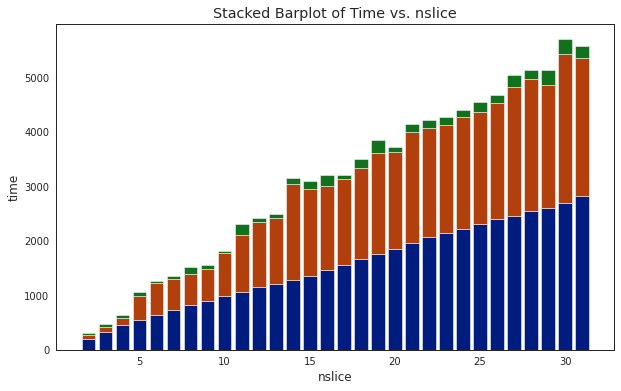

In [31]:
# 设置图形参数

# 设置图形参数
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10, 6))

# 设置颜色
palette = sns.color_palette('dark', n_colors=3)

# 生成 stacked barplot，注意 bottom 参数的指定
ax.bar(pd_df['nslice'], pd_df['time_spaceflow'], color=palette[0], width=0.8)
ax.bar(pd_df['nslice'], pd_df['time_harmony'], color=palette[1], width=0.8, bottom=pd_df['time_spaceflow'])
ax.bar(pd_df['nslice'], pd_df['time_mclust'], color=palette[2], width=0.8, bottom=pd_df['time_spaceflow']+pd_df['time_harmony'])

# 设置图形标签
ax.set_xlabel('nslice')
ax.set_ylabel('time')
ax.set_title('Stacked Barplot of Time vs. nslice')

# 隐藏图例
ax.legend().remove()

# 展示图形
# plt.show()
plt.savefig(f'figures/spaceflow/time_stacked_mclust.pdf',dpi=400,bbox_inches='tight',transparent=True)
